<a href="https://colab.research.google.com/github/Mary7Magdalene/MLL/blob/main/Building_logistic_regression_model_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

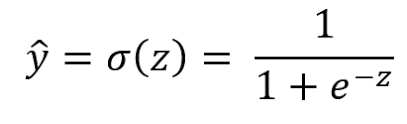

**z = w.x + b**

y_hat -->predicted value

x --> independent variable

w -->weight

b -->bias

Gradient descent
Is an optimization algorthm used for minimizing the loss function in various machine learning algorths. it is used for updating the parameters of the learning model.


w = w-α*dw

b = b-α*db

Learning rate: is a tuning parameter in aoptimization algorthm the determines the step size at each iteration whule moving toward a minimum loss function.

Derivatives:

dw = 1/m *(Ŷ - Y).X

db = 1/m *(Ŷ - Y)



Ŷ - Probability that (y = 1)

Ŷ = p( Y=1 |x)

x - input features

w - weights(the number of input features excluding the target in the dataset)

b -  bias

Importing the dependancies

In [262]:
#importing numpy to create arays
import numpy as np

logistic regression

In [263]:
class Logistic_Regression():

 #declaring learning rate and the number of itrations(the hyperparameters)

  def __init__(self, learning_rate,no_of_iterations):

       self.learning_rate = learning_rate
       self.no_of_iterations = no_of_iterations

  #fit function to train the model with some dataset
  def fit(self, x, y):
      #number of data points in the dataset (number of rows)- m
      #number of input features in the dataset (number of columns) -n
      self.m, self.n = x.shape


      #initiating weight and bias values
      self.w = np.zeros(self.n)

      self.b = 0

      self.x = x

      self.y = y

#implementing gradient descent(for optimization)
      for i in range(self.no_of_iterations):
        self.update_weights()


  def update_weights(self):

 #y_hat formula(sigmoid function)
     y_hat = 1/(1 + np.exp( - (self.x.dot(self.w) + self.b)))  #the second part is similar to w*x + b

  #derivatives
     dw = (1/self.m)*np.dot(self.x.T, (y_hat - self.y))

     db = (1/self.m)*np.sum(y_hat - self.y)

 #updating the weights and bias using gradient descent
     self.w = self.w - self.learning_rate *dw
     self.b = self.b - self.learning_rate *db

 #writing te sigmoid equation and the decision boundary
  def predict(self,x):

     y_pred = 1/(1 + np.exp( - (x.dot(self.w) + self.b )))
     y_pred = np.where( y_pred >0.5,1,0)
     return y_pred

Implementing logistic regression from scratch

In [264]:
#importing dependancies
import numpy as np

In [265]:
class Logistic_Regression():

 #declaring learning rate and the number of itrations(the hyperparameters)

  def __init__(self, learning_rate,no_of_iterations):

       self.learning_rate = learning_rate
       self.no_of_iterations = no_of_iterations

  #fit function to train the model with some dataset
  def fit(self, x, y):
      #number of data points in the dataset (number of rows)- m
      #number of input features in the dataset (number of columns) -n
      self.m, self.n = x.shape


      #initiating weight and bias values
      self.w = np.zeros(self.n)

      self.b =0

      self.x =x

      self.y = y

#implementing gradient descent(for optimization)
      for i in range(self.no_of_iterations):
       self.update_weights()


  def update_weights(self):

 #y_hat formula(sigmoidfunction)
     y_hat = 1/(1 + np.exp( - (self.x.dot(self.w) + self.b)))  #the second part is similar to w*x + b

  #derivatives
     dw = (1/self.m)*np.dot(self.x.T, (y_hat - self.y))

     db = (1/self.m)*np.sum(y_hat - self.y)

 #updating the weights and bias using gradient descent
     self.w = self.w - self.learning_rate *dw
     self.b = self.b - self.learning_rate *db

 #writing the sigmoid equation and the decision boundary
  def predict(self,x):
     y_pred = 1/(1 + np.exp( - (x.dot(self.w) + self.b )))
     y_pred = np.where( y_pred >0.5,1,0)
     return y_pred

In [266]:
#importing the dependancies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data collection and analysis
PIMA diabetes dataset

In [267]:
#loading the dataset into  a pandas dataframe
diabetes_dataset =pd.read_csv('/content/pima_diabbetes.csv')

In [268]:
#printing the first five rows
diabetes_dataset.head()

,pregnant_times,glucose_tolerance_test,Diastolic_blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [269]:
#printing the last five rows of the dataset
diabetes_dataset.tail()

,pregnant_times,glucose_tolerance_test,Diastolic_blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [270]:
#finding the number of rows and columns present in the database
diabetes_dataset.shape

(768, 9)

In [271]:
#getting the statistical measures of data
diabetes_dataset.describe()

,pregnant_times,glucose_tolerance_test,Diastolic_blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0 represents non diabetic

1 represents diabetic

In [272]:
#counting the outcomes of diabetes
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


grouping the data values based on the mean

In [273]:
diabetes_dataset.groupby('Outcome').mean()

,pregnant_times,glucose_tolerance_test,Diastolic_blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [274]:

#separating the data and labels
features = diabetes_dataset.drop(columns ='Outcome' ,axis =1)
target = diabetes_dataset['Outcome']

In [275]:

print(features)

     pregnant_times  glucose_tolerance_test  Diastolic_blood_pressure  \
0                 6                     148                        72   
1                 1                      85                        66   
2                 8                     183                        64   
3                 1                      89                        66   
4                 0                     137                        40   
..              ...                     ...                       ...   
763              10                     101                        76   
764               2                     122                        70   
765               5                     121                        72   
766               1                     126                        60   
767               1                      93                        70   

     Triceps_skin_fold_thickness  serum_insulin  Body_mass_index  \
0                             35              0        

In [276]:


print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [277]:
scaler = StandardScaler()

In [278]:
scaler.fit(features)

StandardScaler()

In [279]:
standardized_data = scaler.transform(features)

In [280]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [281]:
features = standardized_data
target = diabetes_dataset['Outcome']

In [282]:
x=features
y=target

print(x)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train test split

In [289]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [290]:


#training the model
classifier = Logistic_Regression(learning_rate = 0.1,no_of_iterations =1000)

Training the support vector machine

In [291]:
classifier.fit(x_train,y_train)

Model Evaluation

Accuracy score

In [292]:
#accuracy score of the training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediction)

In [293]:
print('Accuracy score of the training data: ', training_data_accuracy)


Accuracy score of the training data:  0.7801302931596091


Accuracy score of the test data

In [294]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [295]:
print('Accuracy score of test data: ',test_data_accuracy)

Accuracy score of test data:  0.7662337662337663


Making a predictive system

In [296]:
input_data = (4,110,92,0,0,37.6,0.191,30)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as wea are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
standardized_data = scaler.transform(input_data_reshaped)
print(standardized_data)

prediction = classifier.predict(standardized_data)
print(prediction)

if (prediction[0] ==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
